# Cleaning AirBnB Listing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import math
import pylab
import scipy.stats as stats
%matplotlib inline

In [2]:
cols = [
    'id',
    'host_id',
    'zipcode',
    'property_type',
    'room_type',
    'accommodates',
    'bedrooms',
    'beds',
    'bed_type',
    'price',
    'number_of_reviews',
    'review_scores_rating',
    'host_listing_count',
    'availability_30',
    'minimum_nights',
    'bathrooms'
]

data = pd.read_csv('abnb-listings.csv', usecols=cols)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (0,5,22,23,36) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data.head(10)

,id,host_id,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating,host_listing_count
0,1069266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1846722,2631556.0,NaN,Apartment,Entire home/apt,10.0,1.0,3.0,3.0,Real Bed,$105.00,1.0,28.0,22.0,85.0,2.0
2,2061725,4601412.0,11221,Apartment,Private room,2.0,1.0,1.0,2.0,Real Bed,$58.00,3.0,4.0,35.0,98.0,4.0
3,44974,198425.0,10011,Apartment,Entire home/apt,2.0,1.0,1.0,1.0,Real Bed,$185.00,10.0,1.0,26.0,96.0,1.0
4,4701675,22590025.0,10011,Apartment,Entire home/apt,2.0,1.0,1.0,2.0,Real Bed,$195.00,1.0,30.0,1.0,100.0,1.0
5,68914,343302.0,11231,Apartment,Entire home/apt,6.0,1.0,2.0,3.0,Real Bed,$165.00,2.0,11.0,16.0,96.0,2.0
6,4832596,4148973.0,11207,Apartment,Private room,2.0,1.0,1.0,1.0,Real Bed,$80.00,1.0,29.0,0.0,NaN,1.0
7,2562510,13119459.0,10013,Apartment,Private room,2.0,1.0,1.0,1.0,Real Bed,$120.00,2.0,5.0,0.0,NaN,1.0
8,3005360,4421803.0,10003,Apartment,Entire home/apt,4.0,1.0,2.0,2.0,Real Bed,$150.00,1.0,30.0,14.0,96.0,4.0
9,2431607,4973668.0,11221,Apartment,Shared room,2.0,1.0,1.0,1.0,Real Bed,$40.00,4.0,0.0,10.0,94.0,4.0


In [4]:
len(data['zipcode'][data.zipcode.isnull()])

168

In [5]:
# check the number of missing values in each column
for col in data.columns:
    print (col + ', Num Missing Values:', len(data[col][data[col].isnull()]))

id, Num Missing Values: 0
host_id, Num Missing Values: 3
zipcode, Num Missing Values: 168
property_type, Num Missing Values: 13
room_type, Num Missing Values: 8
accommodates, Num Missing Values: 7
bathrooms, Num Missing Values: 469
bedrooms, Num Missing Values: 148
beds, Num Missing Values: 105
bed_type, Num Missing Values: 7
price, Num Missing Values: 7
minimum_nights, Num Missing Values: 7
availability_30, Num Missing Values: 7
number_of_reviews, Num Missing Values: 7
review_scores_rating, Num Missing Values: 8663
host_listing_count, Num Missing Values: 8


### 1. Remove NaN Values

In [6]:
# NaN is acceptable for review_scores_rating
origin = len(data)
data = data.dropna(how='any', subset=['zipcode', 'property_type', 'bedrooms', 'beds', 'bathrooms', 'accommodates'])
print('Number of NaN values removed:', origin - len(data))

Number of NaN values removed: 775


### 2. Convert String Numbers to Float

In [7]:
data['price'] = (data['price'].str.replace(r'[^-+\d.]', '').astype(float))

C:\Users\juoer\AppData\Local\Temp/ipykernel_12280/1159581109.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['price'] = (data['price'].str.replace(r'[^-+\d.]', '').astype(float))


In [8]:
data['accommodates'] = pd.to_numeric(data['accommodates'])

### 3. Drop Invalid Data

In [9]:
print ('Num of Accommodates 0:', len(data[data['accommodates'] == 0]))
print ('Num of Bedrooms 0:', len(data[data['bedrooms'] == 0]))
print ('Num of Beds 0:', len(data[data['beds'] == 0]))
print ('Num of Listings w/ Price $0.00:', len(data[data['price'] == 0.00]))

data = data[data['accommodates'] != 0]
data = data[data['bedrooms'] != 0]
data = data[data['beds'] != 0]
data = data[data['price'] != 0.00]

Num of Accommodates 0: 0
Num of Bedrooms 0: 2321
Num of Beds 0: 0
Num of Listings w/ Price $0.00: 0


### 4. Fix Non-Five Digit Zip Codes

In [10]:
data['zipcode'] = data['zipcode'].str.replace(r'-\d+', '')
data.head()

C:\Users\juoer\AppData\Local\Temp/ipykernel_12280/2220809592.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['zipcode'] = data['zipcode'].str.replace(r'-\d+', '')


,id,host_id,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating,host_listing_count
2,2061725,4601412.0,11221,Apartment,Private room,2.0,1.0,1.0,2.0,Real Bed,58.0,3.0,4.0,35.0,98.0,4.0
3,44974,198425.0,10011,Apartment,Entire home/apt,2.0,1.0,1.0,1.0,Real Bed,185.0,10.0,1.0,26.0,96.0,1.0
4,4701675,22590025.0,10011,Apartment,Entire home/apt,2.0,1.0,1.0,2.0,Real Bed,195.0,1.0,30.0,1.0,100.0,1.0
5,68914,343302.0,11231,Apartment,Entire home/apt,6.0,1.0,2.0,3.0,Real Bed,165.0,2.0,11.0,16.0,96.0,2.0
6,4832596,4148973.0,11207,Apartment,Private room,2.0,1.0,1.0,1.0,Real Bed,80.0,1.0,29.0,0.0,NaN,1.0


In [11]:
print('Num of missing review scores:', len(data['review_scores_rating'][data['review_scores_rating'].isnull()]))

Num of missing review scores: 7711


### 5. Investigate Distribution Of Accommodates Column

In [12]:
print('Num of Unique Accomodation: ', np.unique(data['accommodates'].astype(str)))
for i in range(1, 17):
    print('Accommodation {}:'.format(i), len(data[data['accommodates'] == i]))

Num of Unique Accomodation:  ['1.0' '10.0' '11.0' '12.0' '13.0' '14.0' '15.0' '16.0' '2.0' '3.0' '4.0'
 '5.0' '6.0' '7.0' '8.0' '9.0']
Accommodation 1: 2642
Accommodation 2: 11399
Accommodation 3: 2909
Accommodation 4: 4278
Accommodation 5: 982
Accommodation 6: 1214
Accommodation 7: 217
Accommodation 8: 333
Accommodation 9: 57
Accommodation 10: 119
Accommodation 11: 15
Accommodation 12: 43
Accommodation 13: 4
Accommodation 14: 14
Accommodation 15: 5
Accommodation 16: 69


In [13]:
data.groupby('accommodates').agg('count')['id']

accommodates
1.0      2642
2.0     11399
3.0      2909
4.0      4278
5.0       982
6.0      1214
7.0       217
8.0       333
9.0        57
10.0      119
11.0       15
12.0       43
13.0        4
14.0       14
15.0        5
16.0       69
Name: id, dtype: int64

### 6. Distribution of price, accommdates, beds, and review_scores_rating


In [14]:
data['accommodates'].head()

2    2.0
3    2.0
4    2.0
5    6.0
6    2.0
Name: accommodates, dtype: float64

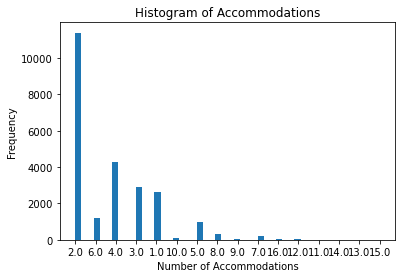

In [15]:
plt.hist(data['accommodates'].astype(str), bins=50)
plt.title("Histogram of Accommodations")
plt.xlabel("Number of Accommodations")
plt.ylabel("Frequency")
plt.show()

A majority of listings have accomodations for 2-4 people. Each bed typically counts for accomodating 2 people. Plotting beds may be more useful for analyzing how many listings are single bedrooms.

In [17]:
# distribution of beds
print('Number of Unique Beds: ', np.unique(data['beds']))
for i in range(1, 17):
    print('Beds {}:'.format(i), len(data[data['beds'] == i]))

Number of Unique Beds:  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 16.]
Beds 1: 16000
Beds 2: 5418
Beds 3: 1770
Beds 4: 610
Beds 5: 243
Beds 6: 117
Beds 7: 41
Beds 8: 22
Beds 9: 3
Beds 10: 20
Beds 11: 4
Beds 12: 9
Beds 13: 1
Beds 14: 15
Beds 15: 0
Beds 16: 27


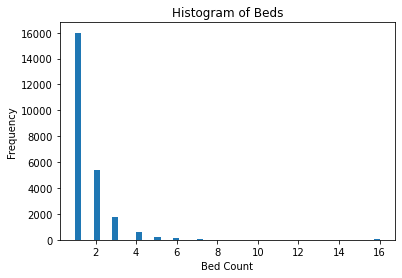

In [19]:
# Distribution for bed
plt.hist(data['beds'], rwidth=1, bins=50)
plt.title("Histogram of Beds")
plt.xlabel("Bed Count")
plt.ylabel("Frequency")
plt.show()

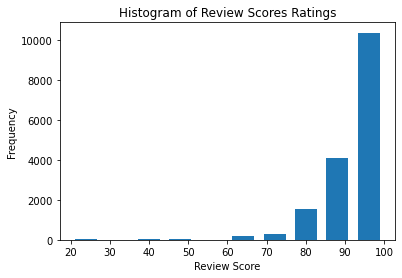

In [20]:
# Distribution for review score rating
plt.hist(data['review_scores_rating'][~data['review_scores_rating'].isnull()], rwidth=0.7)
plt.title("Histogram of Review Scores Ratings")
plt.xlabel("Review Score")
plt.ylabel("Frequency")
plt.show()

### 7. Change NaN score with 0 reviews to 'No Reviews'

In [21]:
idx_vals = data['review_scores_rating'][data['number_of_reviews'] == 0].index.values.tolist()
data.loc[idx_vals, 'review_scores_rating'] = data['review_scores_rating'][data['number_of_reviews'] == 0].replace(np.nan, 'No Reviews')
data.head(10)

,id,host_id,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating,host_listing_count
2,2061725,4601412.0,11221,Apartment,Private room,2.0,1.0,1.0,2.0,Real Bed,58.0,3.0,4.0,35.0,98.0,4.0
3,44974,198425.0,10011,Apartment,Entire home/apt,2.0,1.0,1.0,1.0,Real Bed,185.0,10.0,1.0,26.0,96.0,1.0
4,4701675,22590025.0,10011,Apartment,Entire home/apt,2.0,1.0,1.0,2.0,Real Bed,195.0,1.0,30.0,1.0,100.0,1.0
5,68914,343302.0,11231,Apartment,Entire home/apt,6.0,1.0,2.0,3.0,Real Bed,165.0,2.0,11.0,16.0,96.0,2.0
6,4832596,4148973.0,11207,Apartment,Private room,2.0,1.0,1.0,1.0,Real Bed,80.0,1.0,29.0,0.0,No Reviews,1.0
7,2562510,13119459.0,10013,Apartment,Private room,2.0,1.0,1.0,1.0,Real Bed,120.0,2.0,5.0,0.0,No Reviews,1.0
8,3005360,4421803.0,10003,Apartment,Entire home/apt,4.0,1.0,2.0,2.0,Real Bed,150.0,1.0,30.0,14.0,96.0,4.0
9,2431607,4973668.0,11221,Apartment,Shared room,2.0,1.0,1.0,1.0,Real Bed,40.0,4.0,0.0,10.0,94.0,4.0
11,4833061,24879430.0,11221,Apartment,Private room,2.0,1.0,1.0,1.0,Real Bed,75.0,1.0,2.0,0.0,No Reviews,1.0
12,234327,652642.0,10018,Apartment,Shared room,4.0,1.0,1.0,4.0,Real Bed,80.0,3.0,30.0,7.0,80.0,25.0


In [22]:
# There are some incosistent NaN values that need to be removed
data = data[~data['review_scores_rating'].isnull()]
len(data)

24051

In [23]:
# Check zip code length
data = data[data['zipcode'].map(len) == 5]
len(data)

24048

In [24]:
data = data[data['zipcode'].apply(len) == 5]

### 8. Bucket Review Scores


In [25]:
def convert_scores_buckets(val):
    if val == 'No Reviews':
        return 'No Reviews'
    elif val >= 95.0:
        return '95-100'
    elif val >= 90.0 and val < 95.0:
        return '90-94'
    elif val >= 85.0 and val < 90.0:
        return '85-89'
    elif val >= 80.0 and val < 85.0:
        return '80-84'
    elif val >= 70.0 and val < 80.0:
        return '70-79'
    elif val >= 60.0 and val < 70.0:
        return '60-69'
    elif val >= 50.0 and val < 60.0:
        return '50-59'
    elif val >= 40.0 and val < 50.0:
        return '40-49'
    elif val >= 30.0 and val < 40.0:
        return '30-39'
    elif val >= 20.0 and val < 30.0:
        return '20-29'
    elif val >= 10.0 and val < 20.0:
        return '10-19'
    elif val < 10.0:
        return '0-9'

In [26]:
data['review_scores_rating'] = data['review_scores_rating'].apply(convert_scores_buckets)
print ('Unique Values in the Column:', np.unique(data['review_scores_rating']))

Unique Values in the Column: ['20-29' '30-39' '40-49' '50-59' '60-69' '70-79' '80-84' '85-89' '90-94'
 '95-100' 'No Reviews']


In [27]:
data.head(10)

,id,host_id,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating,host_listing_count
2,2061725,4601412.0,11221,Apartment,Private room,2.0,1.0,1.0,2.0,Real Bed,58.0,3.0,4.0,35.0,95-100,4.0
3,44974,198425.0,10011,Apartment,Entire home/apt,2.0,1.0,1.0,1.0,Real Bed,185.0,10.0,1.0,26.0,95-100,1.0
4,4701675,22590025.0,10011,Apartment,Entire home/apt,2.0,1.0,1.0,2.0,Real Bed,195.0,1.0,30.0,1.0,95-100,1.0
5,68914,343302.0,11231,Apartment,Entire home/apt,6.0,1.0,2.0,3.0,Real Bed,165.0,2.0,11.0,16.0,95-100,2.0
6,4832596,4148973.0,11207,Apartment,Private room,2.0,1.0,1.0,1.0,Real Bed,80.0,1.0,29.0,0.0,No Reviews,1.0
7,2562510,13119459.0,10013,Apartment,Private room,2.0,1.0,1.0,1.0,Real Bed,120.0,2.0,5.0,0.0,No Reviews,1.0
8,3005360,4421803.0,10003,Apartment,Entire home/apt,4.0,1.0,2.0,2.0,Real Bed,150.0,1.0,30.0,14.0,95-100,4.0
9,2431607,4973668.0,11221,Apartment,Shared room,2.0,1.0,1.0,1.0,Real Bed,40.0,4.0,0.0,10.0,90-94,4.0
11,4833061,24879430.0,11221,Apartment,Private room,2.0,1.0,1.0,1.0,Real Bed,75.0,1.0,2.0,0.0,No Reviews,1.0
12,234327,652642.0,10018,Apartment,Shared room,4.0,1.0,1.0,4.0,Real Bed,80.0,3.0,30.0,7.0,80-84,25.0


In [28]:
print ('Num remaining records:', len(data))

Num remaining records: 24048


### 9. Categorical Variable Encoding

In [29]:
property_dummies = pd.get_dummies(data['property_type'])
room_dummies = pd.get_dummies(data['room_type'])
bed_dummies = pd.get_dummies(data['bed_type'])

### 10. Replace original columns with encoded columns

In [30]:
df = pd.concat((data.drop(['property_type', 'room_type', 'bed_type'], axis=1), \
     property_dummies.astype(int), room_dummies.astype(int), bed_dummies.astype(int)), \
     axis=1)

print ('Number of Columns:', len(df.columns))

Number of Columns: 39


### 11. Move target predictor 'price' to end of df

In [31]:
cols = list(df.columns.values)
idx = cols.index('price')
rearrange_cols = cols[:idx] + cols[idx+1:] + [cols[idx]]
df = df[rearrange_cols]

### 12. Convert numerical variables
 

In [32]:
# non-categorical variables need to be converted to float and also normalized
def normalize(col):
    mean = np.mean(col)
    std = np.std(col)
    return col.apply(lambda x: (x - mean) / std)

non_cat_vars = ['accommodates', 'bedrooms', 'beds', 'number_of_reviews', 'host_listing_count', 'availability_30', 'minimum_nights', 'bathrooms']
for col in non_cat_vars:
    df[col] = df[col].astype(float)
    df[col] = normalize(df[col])

In [33]:
df.head()

,id,host_id,zipcode,accommodates,bathrooms,bedrooms,beds,minimum_nights,availability_30,number_of_reviews,...,Villa,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,price
2,2061725,4601412.0,11221,-0.520326,-0.331557,-0.407422,0.381619,0.173883,-0.965822,1.295848,...,0,0,1,0,0,0,0,0,1,58.0
3,44974,198425.0,10011,-0.520326,-0.331557,-0.407422,-0.493064,2.889416,-1.205164,0.822291,...,0,1,0,0,0,0,0,0,1,185.0
4,4701675,22590025.0,10011,-0.520326,-0.331557,-0.407422,0.381619,-0.601984,1.108477,-0.493144,...,0,1,0,0,0,0,0,0,1,195.0
5,68914,343302.0,11231,1.690806,-0.331557,1.266250,1.256302,-0.214051,-0.407357,0.296117,...,0,1,0,0,0,0,0,0,1,165.0
6,4832596,4148973.0,11207,-0.520326,-0.331557,-0.407422,-0.493064,-0.601984,1.028696,-0.545761,...,0,0,1,0,0,0,0,0,1,80.0


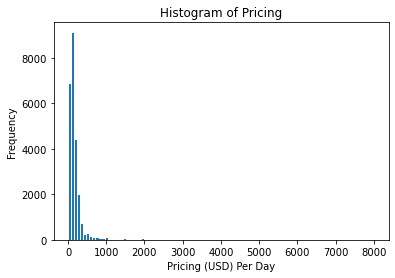

In [40]:
# visualize price distribution
plt.hist(df['price'], bins=100, rwidth=0.7)
plt.title("Histogram of Pricing")
plt.xlabel("Pricing (USD) Per Day")
plt.ylabel("Frequency")
plt.show()

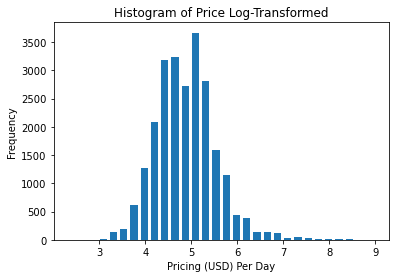

In [43]:
# Histogram indicates pricing is skewed
# log transform 'price'
df['price_log'] = df['price'].apply(lambda x: math.log(x))

plt.hist(df['price_log'], bins=30, rwidth=0.7)
plt.title("Histogram of Price Log-Transformed")
plt.xlabel("Pricing (USD) Per Day")
plt.ylabel("Frequency")
plt.show()

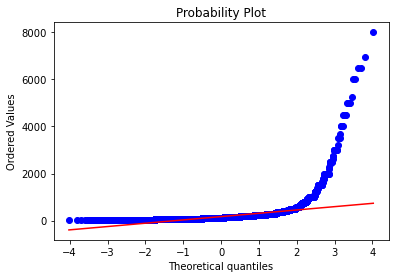

In [44]:
# Plot for log-transformed pricing, show the similarity of normal distribution 
# Blue line is real data. Red line is normal distribution
stats.probplot(df['price'], dist="norm", plot=pylab)
pylab.show()

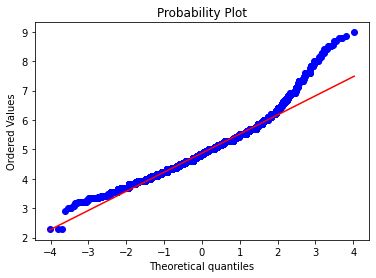

In [45]:
# Plot for log-transformed price
stats.probplot(df['price_log'], dist="norm", plot=pylab)
pylab.show()
# This plot is closer to a normal distribution

In [46]:
# save cleaned data to csv
df.to_csv('output.csv')